In [1]:
import pickle 
        
with open('../analysis/mean_sf_2d_maps.pkl', 'rb') as f:
    mean_sfs = pickle.load(f)
    
with open('../analysis/quartiles_sf_2d_maps.pkl', 'rb') as f:
    quantiles_sfs = pickle.load(f)

In [2]:
import numpy as np

# First we construct these polar map arrays by appending these quadrants to the two already calculated

SQG_map_x_separations = np.append(-np.flip(mean_sfs['x_separations']), mean_sfs['x_separations'], axis=0)
SQG_map_y_separations = np.append(-np.flip(mean_sfs['y_separations']), mean_sfs['y_separations'], axis=0)
SQG_map_advective_SF = np.append(np.flip(mean_sfs['SF_advection_velocity_xy']), 
                                   mean_sfs['SF_advection_velocity_xy'], axis=0)

In [3]:
r_array = np.array(mean_sfs['separation_distances'])
SF_Au_array = np.array(mean_sfs['SF_advection_velocity_xy'])

r_bins = np.linspace(0, np.max(r_array), 350) # Make it countdown so smallest scales map to smallest bin rather than leaving them empty

bin_flags = np.digitize(r_array[:], r_bins)

In [4]:
# Calculate the mean of each bin
bin_means = np.zeros(len(r_bins))
for i in range(1, len(r_bins)):
    bin_values = SF_Au_array[bin_flags == i]
    if len(bin_values) > 0:
        bin_means[i] = np.mean(bin_values)
    else:
        bin_means[i] = np.nan  # Assign NaN if no values fall into the bin

In [5]:
# Calculate diagonal SFs

Diagonal_SF = np.zeros(256)
OffDiagonal_SF = np.zeros(256)
Diagonal_separation = np.zeros(256)

for n in range(1, 256):
    Diagonal_SF[n] = mean_sfs['SF_advection_velocity_xy'][n,256+n]
    OffDiagonal_SF[n] = mean_sfs['SF_advection_velocity_xy'][n,256-n]
    Diagonal_separation[n] = mean_sfs['separation_distances'][n,256+n]
    

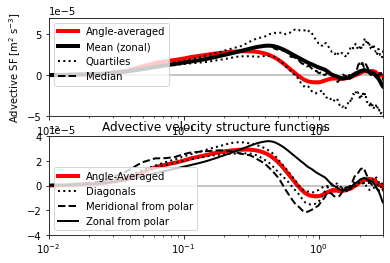

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 15]

fig, (ax1, ax2) = plt.subplots(2,1)

ax1.semilogx(r_bins, bin_means, label=r'Angle-averaged',
             color='r', linestyle='solid', linewidth=4)
ax1.semilogx(mean_sfs['separation_distances'][:,256], mean_sfs['SF_advection_velocity_xy'][:,256], label=r'Mean (zonal)',
             color='k', linestyle='solid', linewidth=4)
ax1.semilogx(mean_sfs['separation_distances'][:,256], quantiles_sfs['SF_advection_velocity_xy']['25th'][:,256], label=r'Quartiles',
             color='k', linestyle='dotted', linewidth=2)
ax1.semilogx(mean_sfs['separation_distances'][:,256], quantiles_sfs['SF_advection_velocity_xy']['50th'][:,256], label=r'Median',
             color='k', linestyle='dashed', linewidth=2)
ax1.semilogx(mean_sfs['separation_distances'][:,256], quantiles_sfs['SF_advection_velocity_xy']['75th'][:,256],
             color='k', linestyle='dotted', linewidth=2)


# On panel 2, plot Diagonal, Off-diagonal, meridional and zonal advectgive SFs

ax2.semilogx(r_bins, bin_means, label=r'Angle-Averaged',
             color='r', linestyle='solid', linewidth=4)

ax2.semilogx(Diagonal_separation, Diagonal_SF, label=r'Diagonals',
             color='k', linestyle='dotted', linewidth=2)

ax2.semilogx(Diagonal_separation, OffDiagonal_SF,
             color='k', linestyle='dotted', linewidth=2)

ax2.semilogx(mean_sfs['separation_distances'][0,256:], mean_sfs['SF_advection_velocity_xy'][0,256:], label=r'Meridional from polar',
             color='k', linestyle='dashed', linewidth=2)

ax2.semilogx(mean_sfs['separation_distances'][:,256], mean_sfs['SF_advection_velocity_xy'][:,256], label=r'Zonal from polar',
             color='k', linestyle='solid', linewidth=2)



ax1.set_ylabel(r"Advective SF [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(1e-2,3e0)
ax2.set_xlim(1e-2,3e0)
ax1.set_ylim(-5e-5,7e-5)
ax2.set_ylim(-4e-5,4e-5)
ax1.legend()
ax2.legend()
ax1.hlines(0,1e-2,3e0,color='k',linestyle='solid',alpha=0.3)
ax2.hlines(0,1e-2,3e0,color='k',linestyle='solid',alpha=0.3)
plt.title('Advective velocity structure functions');

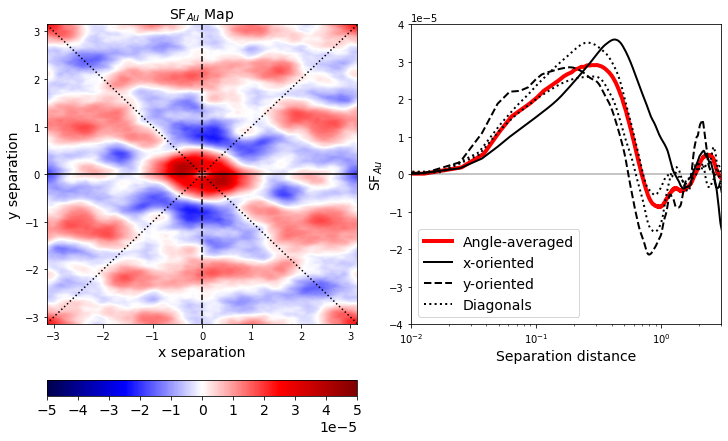

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,6), layout='constrained')

font_size = 14
# Set the font size
plt.rcParams['font.size'] = font_size

cmax_mean = 5e-5
cmax_snapshot = 10*cmax_mean

Advective = axs[0].contourf(SQG_map_x_separations,
            SQG_map_y_separations,
            SQG_map_advective_SF, 
            levels= np.linspace(-cmax_mean, cmax_mean, 1001), 
                            cmap=plt.cm.seismic)
axs[0].set_xlabel('x separation', fontsize = font_size)
axs[0].set_ylabel('y separation', fontsize = font_size)
axs[0].set_title('SF$_{Au}$ Map', fontsize = font_size)

cbar = fig.colorbar(Advective, ax=axs[0], location='bottom')
cbar.set_ticks(np.linspace(-cmax_mean, cmax_mean, 11))
axs[0].axhline(0, color='black', linestyle='-')
axs[0].axvline(0, color='black', linestyle='--')
axs[0].axline([0,0], slope=1, color='black', linestyle=':')
axs[0].axline([0,0], slope=-1, color='black', linestyle=':')

axs[1].semilogx(r_bins, bin_means, label=r'Angle-averaged',
             color='r', linestyle='solid', linewidth=4)

axs[1].semilogx(mean_sfs['separation_distances'][:,256], 
                mean_sfs['SF_advection_velocity_xy'][:,256], label=r'x-oriented',
             color='k', linestyle='solid', linewidth=2)

axs[1].semilogx(mean_sfs['separation_distances'][0,256:], 
                mean_sfs['SF_advection_velocity_xy'][0,256:], label=r'y-oriented',
             color='k', linestyle='dashed', linewidth=2)

axs[1].semilogx(Diagonal_separation, Diagonal_SF, label=r'Diagonals',
             color='k', linestyle='dotted', linewidth=2)

axs[1].semilogx(Diagonal_separation, OffDiagonal_SF,
             color='k', linestyle='dotted', linewidth=2)

axs[1].set_ylabel('SF$_{Au}$', fontsize = font_size)
axs[1].set_xlabel('Separation distance', fontsize = font_size)
axs[1].set_xlim(1e-2,3e0)
axs[1].set_ylim(-4e-5,4e-5)
axs[1].legend()
axs[1].hlines(0,1e-2,3e0,color='k',linestyle='solid',alpha=0.3)

plt.savefig('../plotting/Plots/SQG_SF_Map.png', dpi=300)